In [1]:
# Here we will be using the example from Nielsen of whether to attend the cheese festive or not.
# Our choice is based on 3 inputs: weather, friend, public transport
# For example input [0,1,0] means bad weather, friend available, no public transport
# A Perceptron can make this decision for us

# First we will play around with vector dot product and matrix transpose etc

# initial weights for a decision perceptron and sample inputs

import numpy as np
# sample weights vector w  and two input vectors i1 and i2
w = np.array([6,2,2])
i1 = np.array([1,0,0])
i2 = np.array([0,1,1])

# dot product of 2 vectors
w.dot(i1)

6

In [2]:
w.dot(i2)

4

In [3]:
# Put i1 and i2 into into a matrix, ecah vector will be a row.
ins = np.array([i1, i2])
print(ins)

[[1 0 0]
 [0 1 1]]


In [4]:
# why does this give errors?
# check rows vs cols as it works with w.dot(ins.T) transpose of ins
w.dot(ins)

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [5]:
# A matrix transpose will convert rows into columnms and vice versa
print(ins.T)
w.dot(ins.T)

[[1 0]
 [0 1]
 [0 1]]


array([6, 4])

In [6]:
# Alternatively instead of using the transpose of ins, we could rearrange the dot product
ins.dot(w)

array([6, 4])

In [7]:
# Now we provide the full code for single decision perceptron for attending cheese festival or not
# 3 variable input: weather good, friend coming too, public transport
# Note that we are not training the Perceptron here. That's for the next lab

# i1 = np.array([1, 0, 0])
#i2 = np.array([0,1,1])
import numpy as np

def cheese_decide(input):
    weights = np.array([6,2,2])
    threshold = 5
    # i1 = 6*1 + 2*0 + 2*0 = 6
    # 6*0 + 2*1 + 2*1 = 4
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0


In [8]:
# Perceptron favours good weather above all in deciding
# will attend festival: 6 > 5
cheese_decide(i1)

1

In [18]:
# with poor weather, even with a friend coimg and public transport available not enough to go
# will not attend festival 4 < 5
cheese_decide(i2)

0

In [19]:
# if you change threshold to 3 instead of 5, then with poor weather, friend coming and 
# public transport are enough to decide to go

def cheese_decide(input):
    weights = np.array([6,2,2])
    threshold = 3
    # 4 > 3 for i2
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0

cheese_decide( i2) # now will attend festival

1

In [20]:
# redfine cheese_decide perceptron to use bias instead of threshold, i.e. instead of 
# weights.dot(input) - threshold > 0  use
# weights.dot(input) + bias >  0

def cheese_decide1(input):
    weights = np.array([6,2,2])
    bias = -3
    # (a) (6*1) + (2*0) + (2*0) = 6 + (-3) = 3 > 0 true --> will go
    # (b) (6*0) + (2*1) + (2*1) = 4 + (-3) = 1 > 0 true --> will go
    # (c) (6*0) + (2*0) + (2*1) = 2 + (-3) = -1 > 0 false --> won't go
    if weights.dot(input) + bias > 0:
        return 1
    else:
        return 0


In [21]:
cheese_decide1([1,0,0]), cheese_decide1([0,1,1]), cheese_decide1([0,0,1])

(1, 1, 0)

Exercise 1: Write a function nand(x) for a 2 input perceptron that implements logical NAND with weights -2 and -2 and bias 3. 

In [9]:
inputs = np.array([[0,0],[0,1], [1,0], [1,1]])
print(inputs)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [11]:
def nand(x):
    weights = np.array([-2, -2])
    bias = 3
    net_input = np.dot(x, weights) + bias
    
    # applying nand logic
    if net_input >= 0:
        return 1 # nand is true
    else:
        return 0 # nand is false


print(nand(inputs[0]), nand(inputs[1]), nand(inputs[2]), nand(inputs[3]))

1 1 1 0


Exercise 2: Rewrite the function nand(x) for the 2 input perceptron that implements logical NAND with weights -2 and -2 and bias 3 except that this time all the 4 input vectos are supplied together as a 4 by 2 array. Should return 4 corresponding ouputs as a vector. This will necessitate a loop to iteration thru all the input vectors.

In [12]:
# Modify nand() so that is can process all the input vectos togethjer
# complete the code and run it

# inputs = np.array([[0,0],[0,1], [1,0], [1,1]])

def nand(xs):  
    weights = np.array([-2, -2])
    bias = 3
    outputs = [] # empty list to store results

    for input_vector in xs:
        net_input = np.dot(input_vector, weights) + bias
        if net_input >= 0:
            outputs.append(1)  # NAND is True
        else:
            outputs.append(0)  # NAND is False

    return np.array(outputs)
    
nand(inputs)

array([1, 1, 1, 0])

In [34]:
# Exercise: sigmoid function exercises
# write code for this activation function and test it

# np.exp() numpy function calculates e^-z for each element z in the array z
# 1+np.exp^z shifts range of function to be centred 1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Testing the sigmoid function with sample values
z = np.array([-2, -1, 0, 1, 2])

print(sigmoid(z))

[0.11920292 0.26894142 0.5        0.73105858 0.88079708]


In [41]:
# Exercise: Matplotlib
#!pip install matplotlib
import matplotlib as mplot
import matplotlib.pyplot as plt

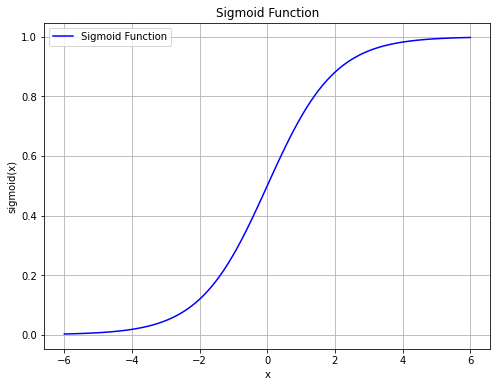

In [39]:
# use Matplotlib to plot a graph of sigmoid
# Look up an online tutorial for a simple example

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate x values
x = np.linspace(-6, 6, 100)  # Create 100 evenly spaced values from -6 to 6

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='b')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

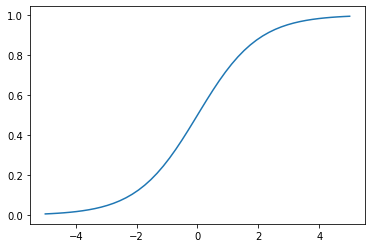

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-5, 5)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)